In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from matplotlib import animation
import itertools
from scipy import interpolate
%matplotlib notebook

In [2]:
def evaluate(func, xrange, yrange, iterations, resolution=100, args=()):
    for iteration in range(iterations):

        if iteration == 0:

            # Set x and y values
            n_sims = resolution
            xvals = np.linspace(xrange[0], xrange[1], n_sims)
            yvals = np.linspace(yrange[0], yrange[1], n_sims)

            # Evaluate
            res = func(np.tile(xvals, (n_sims, 1)).T, np.tile(yvals, (n_sims, 1)), *args)
            res_2d_sign = np.sign(res)

        else:
            # Find boundary regions
            a = np.nonzero(np.nan_to_num(np.diff(res_2d_sign, axis=0)))
            b = np.nonzero(np.nan_to_num(np.diff(res_2d_sign, axis=1)))
            c = np.nonzero(np.nan_to_num(res_2d_sign[:-1, :-1] - res_2d_sign[1:, 1:]))
            xpoints = np.r_[a[0], b[0], c[0]]
            ypoints = np.r_[a[1], b[1], c[1]]

            # Set x and y values
            n_sims = resolution * (n_sims - 1) + 1
            run_bool = np.zeros([n_sims, n_sims])
            for x, y in zip(xpoints, ypoints):
                run_bool[x * resolution:x * resolution + (resolution + 1),
                y * resolution:y * resolution + (resolution + 1)] = 1
            sims_array_ind = np.nonzero(run_bool)
            xvals = xrange[0] + sims_array_ind[0] * (xrange[1] - xrange[0]) / n_sims
            yvals = yrange[0] + sims_array_ind[1] * (yrange[1] - yrange[0]) / n_sims

            # Evaluate
            res = func(xvals, yvals, *args)

            # Organise res
            res_2d = np.nan * np.zeros([n_sims, n_sims])
            for r in range(len(res)):
                res_2d[sims_array_ind[0][r], sims_array_ind[1][r]] = res[r]
            res_2d_sign = np.sign(res_2d)

    a = np.nonzero(np.nan_to_num(np.diff(res_2d_sign, axis=0)))
    b = np.nonzero(np.nan_to_num(np.diff(res_2d_sign, axis=1)))
    c = np.nonzero(np.nan_to_num(res_2d_sign[:-1, :-1] - res_2d_sign[1:, 1:]))
    xpoints = np.r_[a[0], b[0], c[0]]
    ypoints = np.r_[a[1], b[1], c[1]]

    xpoints = xrange[0] + (xpoints / n_sims) * (xrange[1] - xrange[0])
    ypoints = yrange[0] + (ypoints / n_sims) * (yrange[1] - yrange[0])
    return xpoints, ypoints


def func(b, a, k0=0.067, lamda=1, K=1, delta=1):
    return b * (k0 + (lamda * (a ** 2)) / (K ** 2 + a ** 2)) - delta * a

In [3]:
xpoints, ypoints = evaluate(func, (0, 2.5), (0, 2.5), resolution=50, iterations=2, args=())
sign = np.sign(func(xpoints, ypoints + 0.01))

<IPython.core.display.Javascript object>


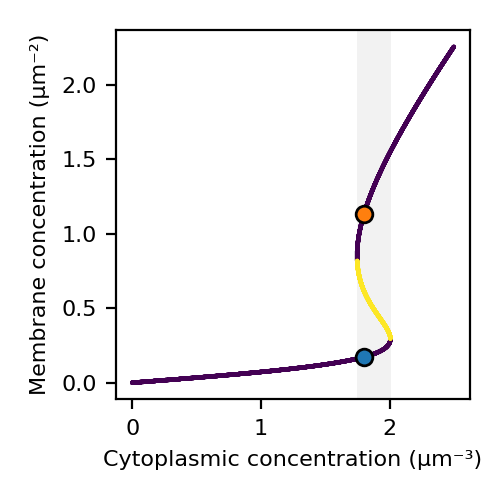

In [23]:
fig, ax = plt.subplots()
ax.scatter(xpoints, ypoints, s=0.3, c=sign)
ax.scatter(1.8016206474100231, 0.1731827821402167, edgecolors='k')
ax.scatter(1.8016206474100231, 1.1329176917468908, edgecolors='k')
ax.axvspan(1.75, 2.01, alpha=0.1, color='gray', linewidth=0, zorder=0)
ax.set_xlabel('Cytoplasmic concentration (μm⁻³)', fontsize=8)
ax.set_ylabel('Membrane concentration (μm⁻²)', fontsize=8)
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()
fig.savefig('Figs/nullcline.png', dpi=600, transparent=True)